In [1]:
pip install pystan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.0 MB/s eta 0:00:00


In [2]:
pip install prophet --no-cache-dir

In [3]:
# fbProphet / prophet
from prophet import Prophet
from prophet.plot import plot_plotly
# Yahoo Finance
!pip install yfinance
import yfinance as yf
# Others
import pandas as pd
from plotly import graph_objs as go
from datetime import datetime

# **Downloading Data From yfinance**

In [4]:
ySymbol="TSLA"

In [5]:
data = yf.download(
    tickers = ySymbol,
    period = "2y",
    interval = "1d",
    group_by = 'ticker',
    auto_adjust = True,
    prepost = True
    )

[*********************100%%**********************]  1 of 1 completed


In [6]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-15,317.736664,326.250000,309.416656,325.329987,75169200
2021-12-16,331.500000,331.660004,307.283325,308.973328,82771500
2021-12-17,304.923340,320.220001,303.013336,310.856659,100437300
2021-12-20,303.566681,307.230011,297.796661,299.980011,56480100
2021-12-21,305.623322,313.166656,295.373322,312.843323,71517900
...,...,...,...,...,...
2023-12-11,242.740005,243.440002,237.449997,239.740005,97913900
2023-12-12,238.550003,238.990005,233.869995,237.009995,95328300
2023-12-13,234.190002,240.300003,228.199997,239.289993,146286300


# **Resetting Index**

In [7]:
data.reset_index(inplace=True)

# **Plotting the Raw Data**

In [8]:
import plotly.offline as py

In [9]:
py.iplot([go.Scatter(
    x=data['Date'],
    y=data['Close']
)])

# **Fixing the dataset according to FBProphet**

In [10]:
df_train = data[['Date', 'Close']]
df_train = df_train.rename(columns={"Date": "ds", "Close": "y"})
df_train.head()

,ds,y
0,2021-12-15,325.329987
1,2021-12-16,308.973328
2,2021-12-17,310.856659
3,2021-12-20,299.980011
4,2021-12-21,312.843323


# **Modelling**

In [11]:
m = Prophet(daily_seasonality=True)
m.fit(df_train)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9pdbkjap/837q3zuq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9pdbkjap/3s8sj8z1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29913', 'data', 'file=/tmp/tmp9pdbkjap/837q3zuq.json', 'init=/tmp/tmp9pdbkjap/3s8sj8z1.json', 'output', 'file=/tmp/tmp9pdbkjap/prophet_modelns9uo2hg/prophet_model-20231215182743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# **Making Future Predictions**

The next step is to prepare our model to make future predictions. This is achieved using the Prophet.make_future_dataframe method and passing the number of days we’d like to predict in the future. We use the periods attribute to specify this. This also include the historical dates. We’ll use these historical dates to compare the predictions with the actual values in the ds column.

periods: int no. of periods to forecast forward

In [12]:
future = m.make_future_dataframe(periods=2*365)

# **Obtaining the Forecasts**

We use the predict method to make future predictions. This will generate a dataframe with a yhat column that will contain the predictions.

In [13]:
forecast = m.predict(future)

# **Plotting the Forecasts**
Prophet has an inbuilt feature that enables us to plot the forecasts we just generated. This is achieved using mode.plot() and passing in our forecasts as the argument. The blue line in the graph represents the predicted values while the black dots represents the data in our dataset

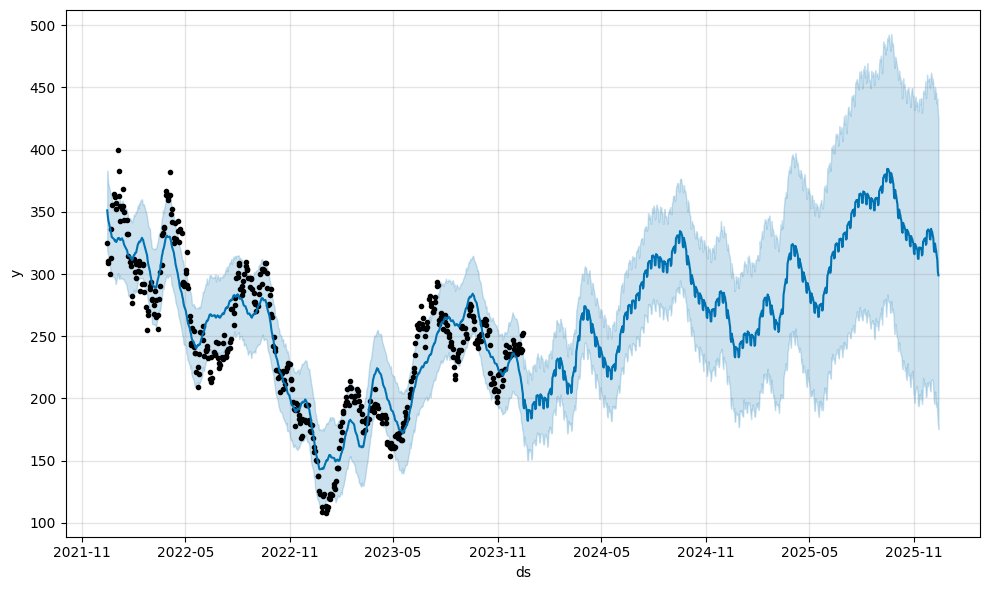

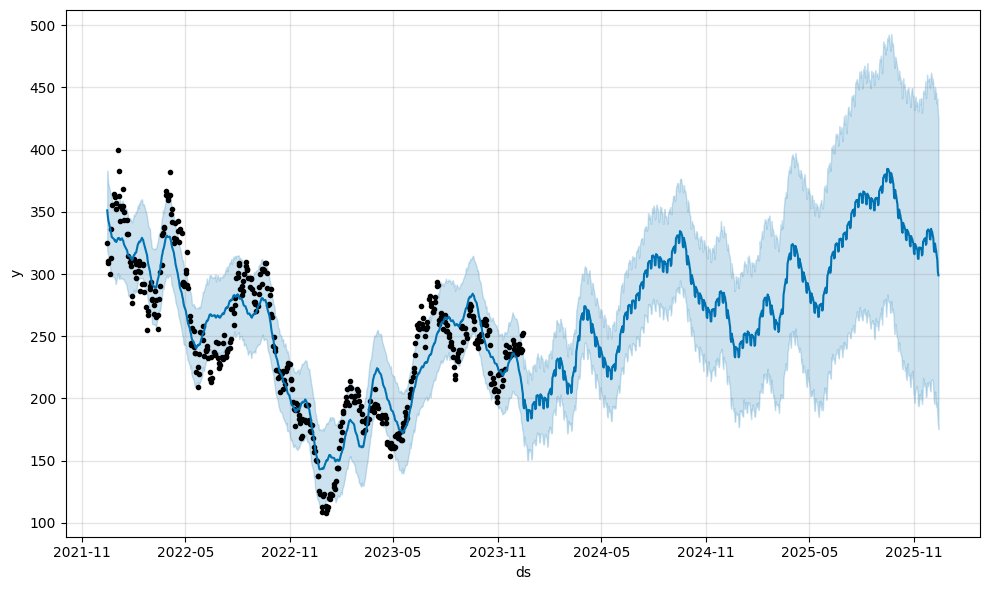

In [14]:
m.plot(forecast)

Here's a breakdown of the key elements in the graph:

- Dates (bottom axis): The x-axis represents time, with the dates of the data points labelled. In this case, the dates range from 2021-11 to 2025-11.
- Values (left axis): The y-axis represents the values of the time series being forecast. In this case, the values appear to range from 100 to 450.
Trend: The blue line shows the overall trend of the time series, as predicted by Prophet. It appears to be a generally upward trend, with some fluctuations.
- Seasonality: The grey shaded area around the blue line represents the seasonal component of the forecast. This means that the forecast is accounting for predictable cyclical patterns in the data, such as monthly or yearly variations.
- Confidence interval: The grey shaded area also represents the uncertainty or confidence interval around the predictions. The wider the grey area, the less certain Prophet is about the predicted value at that point in time.
Overall, the graph suggests that the time series is expected to continue its upward trend in the future, with some seasonal fluctuations. However, there is some uncertainty around the predictions, as indicated by the grey shaded area.

In [15]:
py.iplot([
    go.Scatter(x=df_train['ds'], y=df_train['y'], name='Actual'),
    go.Scatter(x=forecast['ds'], y=forecast['yhat'], name='Predicted')
])

# **Plotting the Forecast Components**
The plot_components method plots the trend, yearly and weekly seasonality of the time series data.

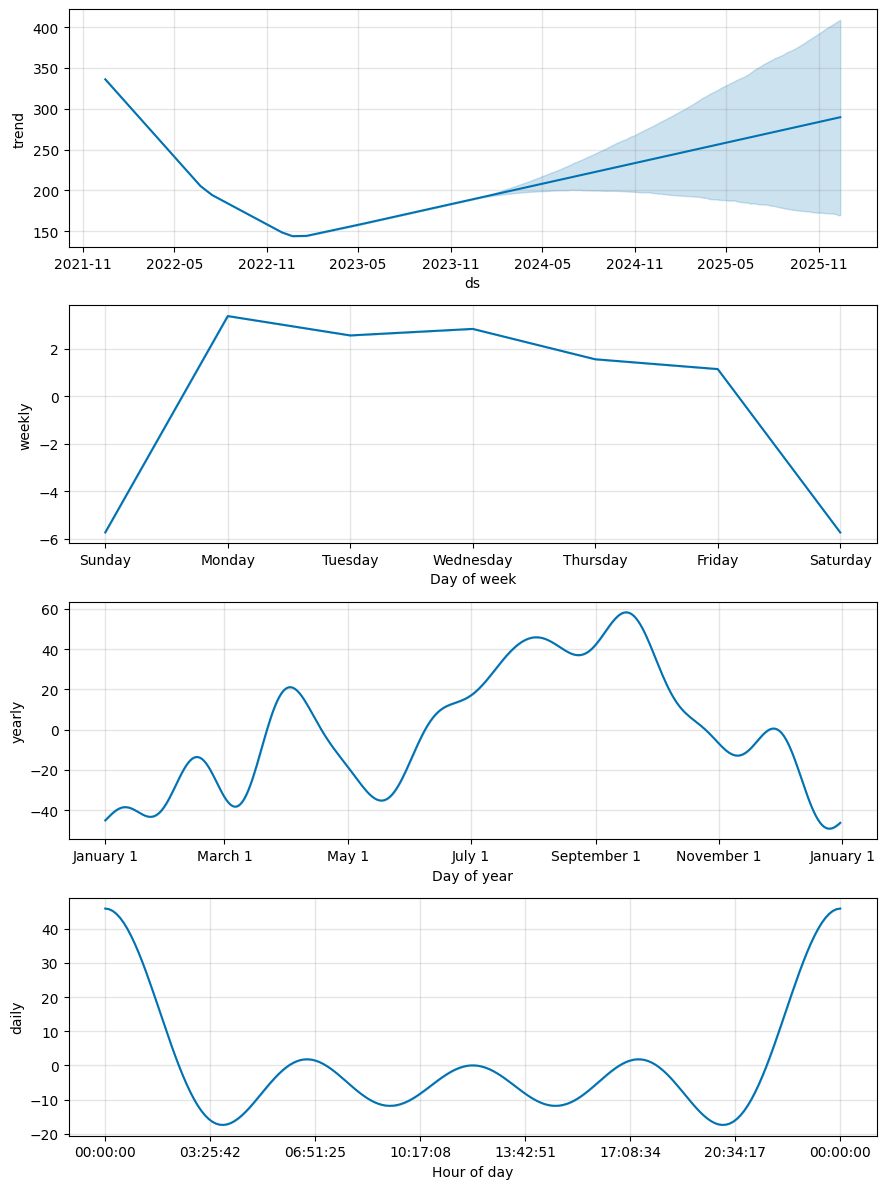

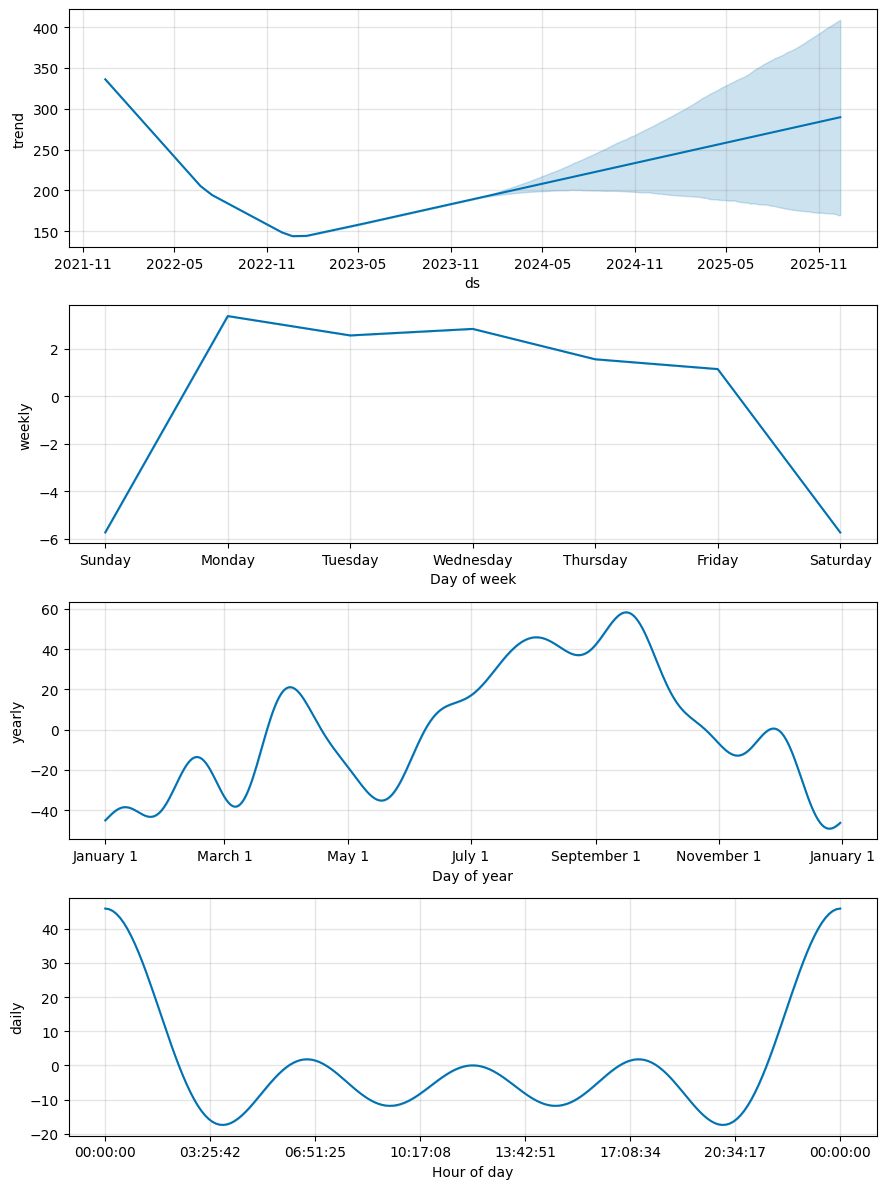

In [16]:
m.plot_components(forecast)

# **Cross Validation**
Measure the forecast error using the historical data. We’ll do this by comparing the predicted values with the actual values. In order to perform this operation we select cut of points in the history of the data and fit the model with data upto that cut off point. Afterwards we compare the actual values to the predicted values. The cross_validation method allows us to do this in Prophet. This method take the following parameters as explained below:

Horizon the forecast horizon.
Initial the size of the initial training period.
Period the spacing between cutoff dates.
The output of the cross_validation method is a dataframe containing y the true values and yhat the predicted values. We’ll use this dataframe to compute the prediction errors.

In [17]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:prophet:Making 1 forecasts with cutoffs between 2022-12-15 00:00:00 and 2022-12-15 00:00:00


  0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp9pdbkjap/m0f9apeh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp9pdbkjap/zu7jjtlq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71550', 'data', 'file=/tmp/tmp9pdbkjap/m0f9apeh.json', 'init=/tmp/tmp9pdbkjap/zu7jjtlq.json', 'output', 'file=/tmp/tmp9pdbkjap/prophet_model3gv1su49/prophet_model-20231215182752.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2022-12-16,165.448126,151.730121,179.522487,150.229996,2022-12-15
1,2022-12-19,169.654255,156.431494,183.537753,149.869995,2022-12-15
2,2022-12-20,171.305259,157.395909,186.795305,137.800003,2022-12-15
3,2022-12-21,173.993689,159.529205,188.343280,137.570007,2022-12-15
4,2022-12-22,174.427103,159.961434,188.136814,125.349998,2022-12-15


# **Obtaining the Performance Metrics**
We use the performance_metrics utility to compute the Mean Squared Error(MSE), Root Mean Squared Error(RMSE),Mean Absolute Error(MAE), Mean Absolute Percentage Error(MAPE) and the coverage of the the yhat_lower and yhat_upper estimates.

In [18]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,40 days,4878.702836,69.847712,63.321518,0.527103,0.611438,0.397841,0.04
1,41 days,4872.533160,69.803533,63.064587,0.525487,0.611438,0.396348,0.08
2,42 days,4862.496796,69.731605,62.747361,0.523165,0.611438,0.394466,0.12
3,43 days,4861.541852,69.724758,62.733033,0.520892,0.611438,0.394013,0.12
4,46 days,4833.090370,69.520431,62.268374,0.516255,0.611438,0.391094,0.12
...,...,...,...,...,...,...,...,...
222,361 days,41738.536057,204.300113,203.560458,0.868086,0.879829,1.538874,0.00
223,362 days,42571.781639,206.329304,205.692188,0.874775,0.881182,1.559336,0.00
224,363 days,43376.141096,208.269395,207.711208,0.880974,0.881924,1.578517,0.00
225,364 days,44422.343516,210.766087,210.237600,0.887394,0.884765,1.598742,0.00


The forecast performance was evaluated by measuring forecast errors using historical data. The cross_validation method was employed, which involves fitting the model with data up to a specified cutoff point and then comparing the actual values with the predicted values. Performance metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), Mean Absolute Percentage Error (MAPE), Median Absolute Percentage Error (MdAPE), Symmetric Mean Absolute Percentage Error (SMAPE), and coverage of the lower and upper estimates were calculated for various forecast horizons.



# **Visualizing Performance Metrics**
The performance Metrics can be visualized using the plot_cross_validation_metric utility. Let’s visualize the RMSE below

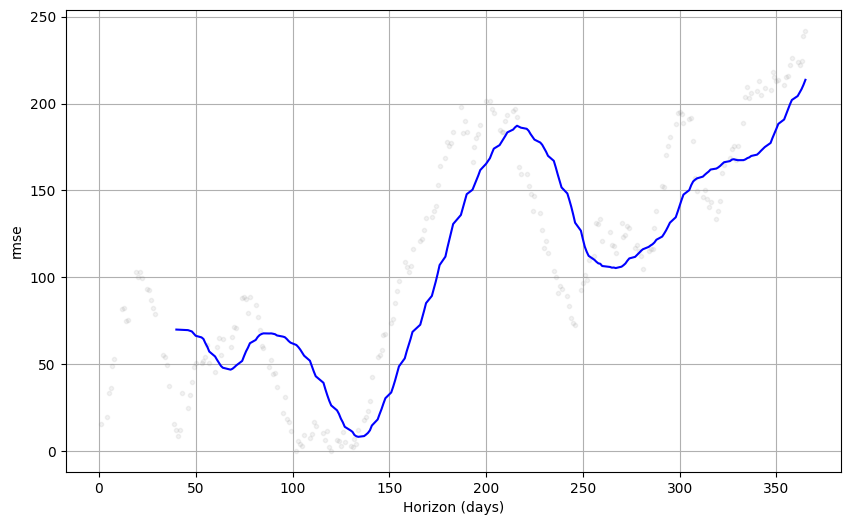

In [19]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')